### Caio de Lima Saigg 254677

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/IMLDS/gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


# Data preprocessing

## Load and Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
df[['Gender','Workout_Type']]

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength
...,...,...
968,Male,Strength
969,Male,Strength
970,Female,Cardio
971,Male,HIIT


### The dataset contains two categorical features we will have to encode them to be able to use them in machine learning algorithms (some are able to use categorical data, but not all).

### The ranges for each feature varies greatly, so we will also normalize/standarize the data.

## Data cleaning

In [7]:
import pandas.api.types as ptypes
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder

CONTINUOUS_FEATURES = [col for col in df.columns if (ptypes.is_numeric_dtype(df[col]) and col != 'Experience_Level')]
CATEGORICAL_FEATURES = ['Gender','Workout_Type']

imputer = KNNImputer(n_neighbors=2, weights="uniform")
df[CONTINUOUS_FEATURES] = pd.DataFrame(imputer.fit_transform(df[CONTINUOUS_FEATURES]))

for catFeat in CATEGORICAL_FEATURES:
  le = LabelEncoder()
  le.fit(df[catFeat])
  df[catFeat] = le.transform(df[catFeat])

imputer = SimpleImputer(strategy='most_frequent')
df[CATEGORICAL_FEATURES] = pd.DataFrame(imputer.fit_transform(df[CATEGORICAL_FEATURES]), columns=CATEGORICAL_FEATURES)
df.dropna()

print(df)

      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0    56.0       1         88.3        1.71    180.0    157.0         60.0   
1    46.0       0         74.9        1.53    179.0    151.0         66.0   
2    32.0       0         68.1        1.66    167.0    122.0         54.0   
3    25.0       1         53.2        1.70    190.0    164.0         56.0   
4    38.0       1         46.1        1.79    188.0    158.0         68.0   
..    ...     ...          ...         ...      ...      ...          ...   
968  24.0       1         87.1        1.74    187.0    158.0         67.0   
969  25.0       1         66.6        1.61    184.0    166.0         56.0   
970  59.0       0         60.4        1.76    194.0    120.0         53.0   
971  32.0       1        126.4        1.83    198.0    146.0         62.0   
972  46.0       1         88.7        1.63    166.0    146.0         66.0   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentag

### KNNImputer was used to handle missing values in the continuous data. This approach fills the missing values based on similarity to other records in the dataset. KNeighborsImputer doesn't directly handle categorical data because it calculates averages, which don’t make sense for categories.

### The categorical features were then treated separately. First they were transformed into numerical data using LabelEnconder and then any missing value was substituted by the mode.

### df.dropna serves as security to delete any row with missing value that somehow wasn't handled.

In [8]:
from sklearn.preprocessing import StandardScaler

dfStandard = df.copy()
scaler = StandardScaler()
scaler.fit(dfStandard[CONTINUOUS_FEATURES])
dfStandard[CONTINUOUS_FEATURES] = scaler.transform(dfStandard[CONTINUOUS_FEATURES])
dfStandard.describe()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,9.730000e+02,973.000000,9.730000e+02,9.730000e+02,9.730000e+02,9.730000e+02,9.730000e+02,9.730000e+02,9.730000e+02,973.000000,9.730000e+02,9.730000e+02,9.730000e+02,973.000000,9.730000e+02
mean,1.350981e-16,0.525180,-2.345959e-16,-8.324961e-16,-7.266085e-16,-6.672748e-16,-1.830213e-16,-6.572338e-17,8.489270e-17,1.494347,-2.610679e-16,2.884526e-16,-1.022364e-16,1.809866,-1.533545e-16
std,1.000514e+00,0.499622,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.125472,1.000514e+00,1.000514e+00,1.000514e+00,0.739693,1.000514e+00
min,-1.698893e+00,0.000000,-1.597175e+00,-1.743613e+00,-1.726066e+00,-1.657634e+00,-1.669061e+00,-2.206235e+00,-2.210713e+00,0.000000,-2.393908e+00,-1.878125e+00,-1.448299e+00,1.000000,-1.891432e+00
25%,-8.775150e-01,0.000000,-7.432643e-01,-8.035741e-01,-8.579921e-01,-8.904271e-01,-8.497572e-01,-6.312350e-01,-6.804458e-01,0.000000,-5.877005e-01,-7.111930e-01,-3.525021e-01,1.000000,-7.213157e-01
50%,1.081382e-01,1.000000,-1.818535e-01,-9.854471e-02,1.008143e-02,-5.347437e-02,-3.045373e-02,1.043165e-02,-4.558658e-02,2.000000,1.955223e-01,-4.437461e-02,-3.525021e-01,2.000000,-1.129752e-01
75%,8.473782e-01,1.000000,5.729845e-01,6.064847e-01,8.781549e-01,8.532244e-01,7.888497e-01,5.937650e-01,6.259697e-01,2.000000,6.910307e-01,7.891484e-01,7.432951e-01,2.000000,5.479379e-01
max,1.668756e+00,1.000000,2.644071e+00,2.173217e+00,1.659421e+00,1.759923e+00,1.608153e+00,2.168765e+00,3.220452e+00,3.000000,1.602127e+00,1.789376e+00,1.839092e+00,3.000000,3.744354e+00


### For multi-model comparisons, standardization is generally preferred across models for consistent scaling.

## Split data

In [9]:
from sklearn.model_selection import train_test_split

X_classification = dfStandard[CONTINUOUS_FEATURES + CATEGORICAL_FEATURES]
y_classification = dfStandard['Experience_Level']

XC_train, XC_test, yC_train, yC_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_regression = dfStandard[[cols for cols in dfStandard.keys() if cols != 'Calories_Burned']]

# Using non standarized label
y_regression = df['Calories_Burned']

XR_train, XR_test, yR_train, yR_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Classification Task

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

## K-Nearest Neighbors (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XC_train, yC_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_knn = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_knn, XC_train, yC_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

yC_pred = best_knn.predict(XC_test)
print(classification_report(yC_test, yC_pred))

yC_pred_proba = best_knn.predict_proba(XC_test)
aucS = roc_auc_score(yC_test, yC_pred_proba, multi_class='ovr')
print(f"AUC: {aucS:.4f}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8290074441687345
Cross-Validation Accuracy: 0.8290
              precision    recall  f1-score   support

           1       0.84      0.72      0.77        78
           2       0.74      0.85      0.80        75
           3       1.00      1.00      1.00        42

    accuracy                           0.83       195
   macro avg       0.86      0.86      0.86       195
weighted avg       0.84      0.83      0.83       195

AUC: 0.9384


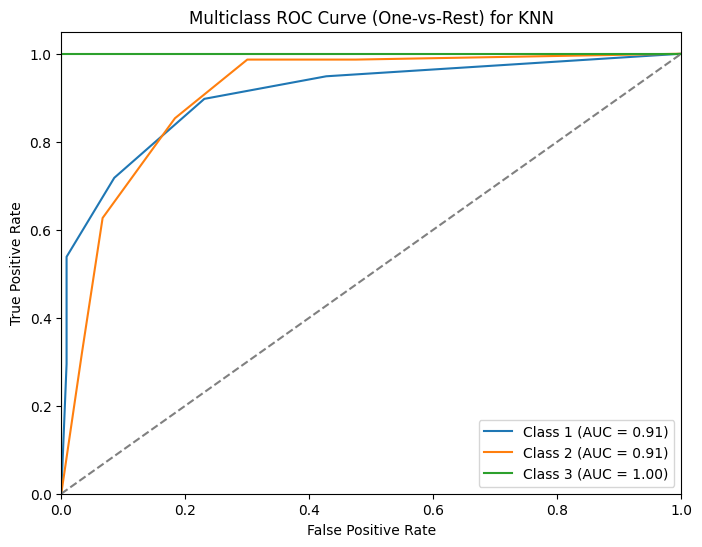

In [12]:
# Binarize the labels (useful for ROC AUC calculation)
yC_test_bin = label_binarize(yC_test, classes=[1,2,3])  # Binary labels for each class

# Plot ROC curve for each class
n_classes = yC_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yC_test_bin[:, i], yC_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for KNN')
plt.legend(loc='lower right')
plt.show()

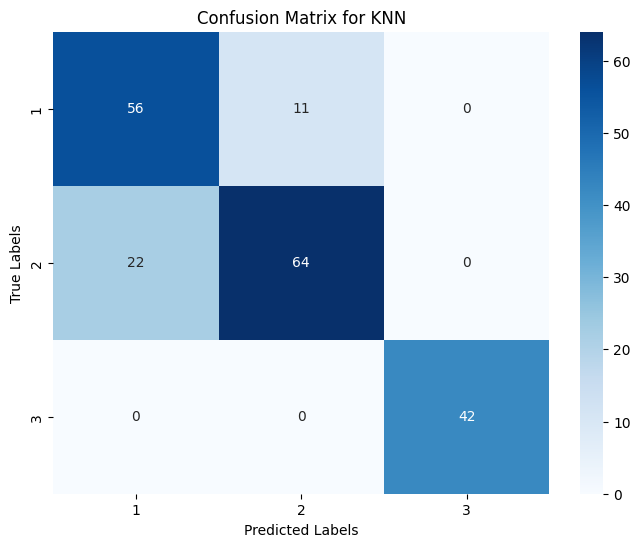

In [13]:
cm = confusion_matrix(yC_pred, yC_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini','entropy', 'log_loss'],  # The function to measure the quality of a split
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XC_train, yC_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_dtc = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_dtc, XC_train, yC_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

yC_pred = best_dtc.predict(XC_test)
print(classification_report(yC_test, yC_pred))

yC_pred_proba = best_dtc.predict_proba(XC_test)
aucS = roc_auc_score(yC_test, yC_pred_proba, multi_class='ovr')
print(f"AUC: {aucS:.4f}")

Best Parameters: {'criterion': 'entropy'}
Best Cross-Validation Score: 0.8637303556658396
Cross-Validation Accuracy: 0.8547
              precision    recall  f1-score   support

           1       0.87      0.85      0.86        78
           2       0.84      0.87      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.89      0.89      0.89       195

AUC: 0.9212


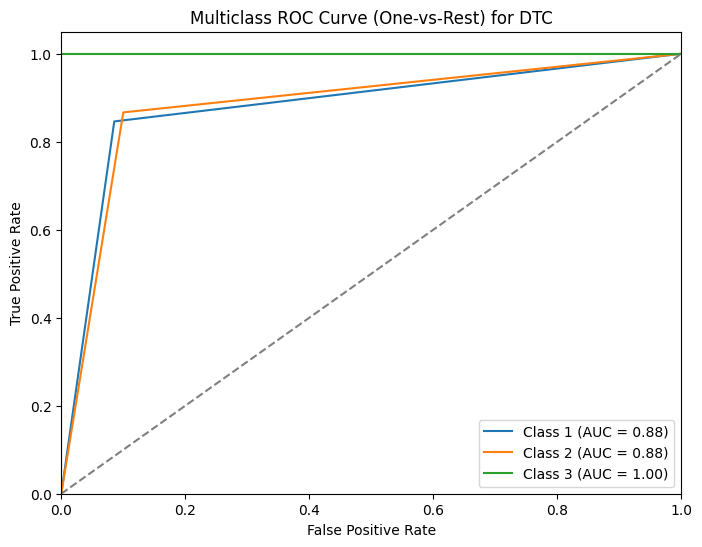

In [15]:
# Binarize the labels (useful for ROC AUC calculation)
yC_test_bin = label_binarize(yC_test, classes=[1,2,3])  # Binary labels for each class

# Plot ROC curve for each class
n_classes = yC_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yC_test_bin[:, i], yC_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for DTC')
plt.legend(loc='lower right')
plt.show()

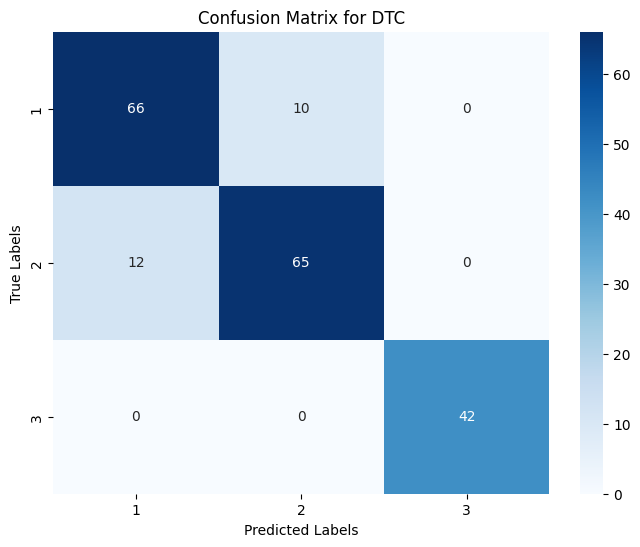

In [16]:
cm = confusion_matrix(yC_pred, yC_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix for DTC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [20, 50, 80, 100, 150, 200, 250],  # Number of trees in the forest
    'criterion': ['gini','entropy', 'log_loss'],       # The function to measure the quality of a split
    'max_depth': [None, 2, 10, 20],                    # The maximum depth of the tree
    'max_features': ['sqrt', 'log2', None, 3]          # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XC_train, yC_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_rfc = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_rfc, XC_train, yC_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

yC_pred = best_rfc.predict(XC_test)
print(classification_report(yC_test, yC_pred))

yC_pred_proba = best_rfc.predict_proba(XC_test)
aucS = roc_auc_score(yC_test, yC_pred_proba, multi_class='ovr')
print(f"AUC: {aucS:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation Score: 0.9022497932175352
Cross-Validation Accuracy: 0.8945
              precision    recall  f1-score   support

           1       0.95      0.81      0.88        78
           2       0.83      0.96      0.89        75
           3       1.00      1.00      1.00        42

    accuracy                           0.91       195
   macro avg       0.93      0.92      0.92       195
weighted avg       0.92      0.91      0.91       195

AUC: 0.9780


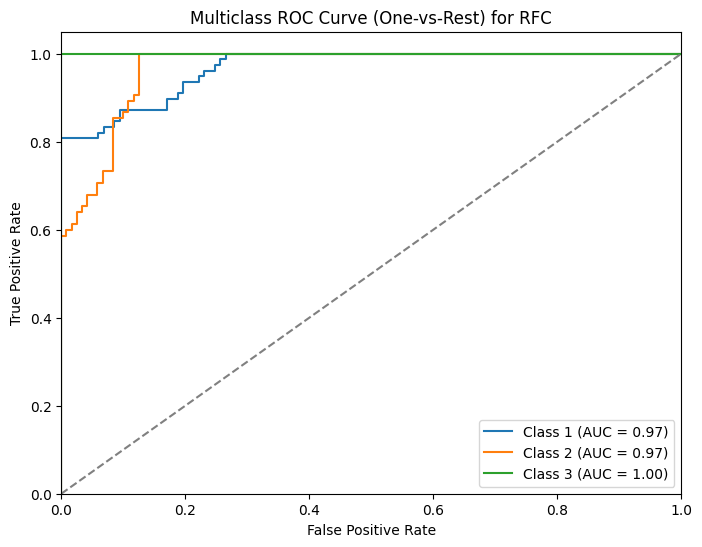

In [18]:
# Binarize the labels (useful for ROC AUC calculation)
yC_test_bin = label_binarize(yC_test, classes=[1,2,3])  # Binary labels for each class

# Plot ROC curve for each class
n_classes = yC_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yC_test_bin[:, i], yC_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for RFC')
plt.legend(loc='lower right')
plt.show()

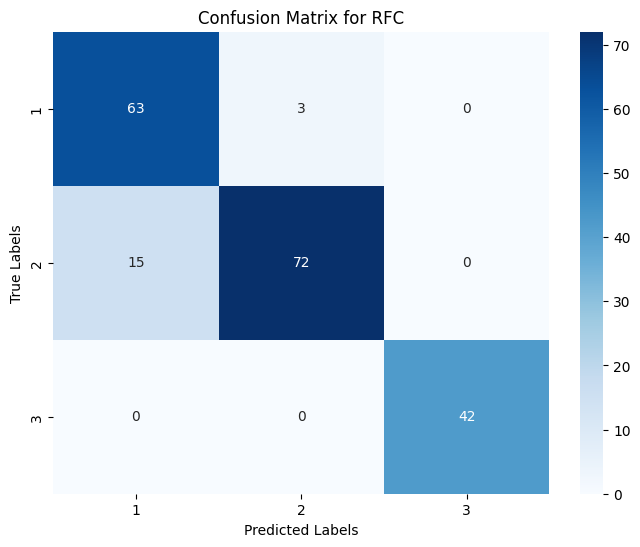

In [19]:
cm = confusion_matrix(yC_pred, yC_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Support Vector Machine

In [20]:
from sklearn.svm import SVC

svc = SVC()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],                 # Kernel type to be used in the algorithm
    'degree': [1,2,3,4,5],                                          # Degree of the polynomial kernel function
    'gamma': ['scale','auto', 0.2, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XC_train, yC_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_svc = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_svc, XC_train, yC_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

yC_pred = best_svc.predict(XC_test.to_numpy())
print(classification_report(yC_test, yC_pred))

proba_svc = SVC(kernel = grid_search.best_params_['kernel'], degree = grid_search.best_params_['degree'], gamma = grid_search.best_params_['gamma'], probability=True)
proba_svc.fit(XC_train, yC_train)
yC_pred_proba = proba_svc.predict_proba(XC_test)
aucS = roc_auc_score(yC_test, yC_pred_proba, multi_class='ovr')
print(f"AUC: {aucS:.4f}")

Best Parameters: {'degree': 1, 'gamma': 0.2, 'kernel': 'poly'}
Best Cross-Validation Score: 0.875277088502895
Cross-Validation Accuracy: 0.8753
              precision    recall  f1-score   support

           1       0.88      0.85      0.86        78
           2       0.85      0.88      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.89      0.89      0.89       195

AUC: 0.9786


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


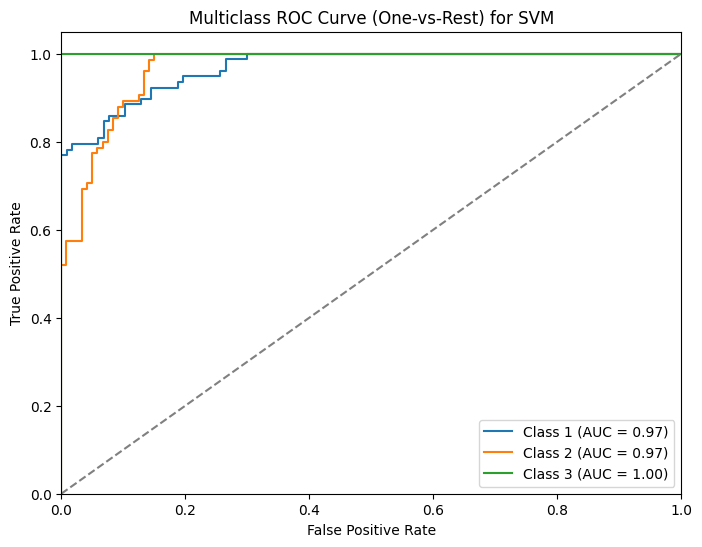

In [21]:
# Binarize the labels (useful for ROC AUC calculation)
yC_test_bin = label_binarize(yC_test, classes=[1,2,3])  # Binary labels for each class

# Plot ROC curve for each class
n_classes = yC_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yC_test_bin[:, i], yC_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for SVM')
plt.legend(loc='lower right')
plt.show()

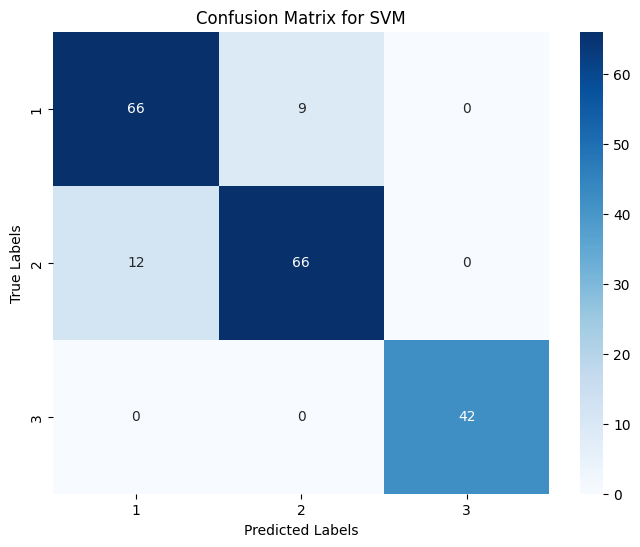

In [22]:
cm = confusion_matrix(yC_pred, yC_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XC_train, yC_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


best_gnb = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_gnb, XC_train, yC_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

yC_pred = best_gnb.predict(XC_test)
print(classification_report(yC_test, yC_pred))

yC_pred_proba = best_rfc.predict_proba(XC_test)
aucS = roc_auc_score(yC_test, yC_pred_proba, multi_class='ovr')
print(f"AUC: {aucS:.4f}")

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Score: 0.8791397849462366
Cross-Validation Accuracy: 0.8791
              precision    recall  f1-score   support

           1       0.88      0.85      0.86        78
           2       0.85      0.88      0.86        75
           3       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.89      0.89      0.89       195

AUC: 0.9780


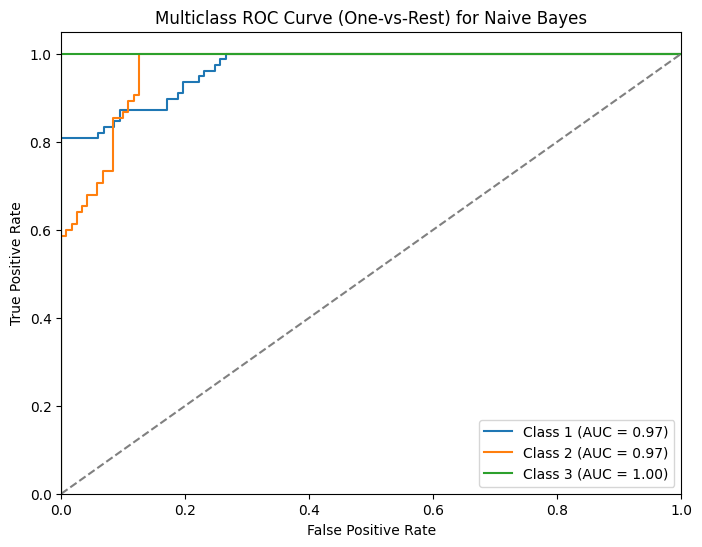

In [24]:
# Binarize the labels (useful for ROC AUC calculation)
yC_test_bin = label_binarize(yC_test, classes=[1,2,3])  # Binary labels for each class

# Plot ROC curve for each class
n_classes = yC_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(yC_test_bin[:, i], yC_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest) for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

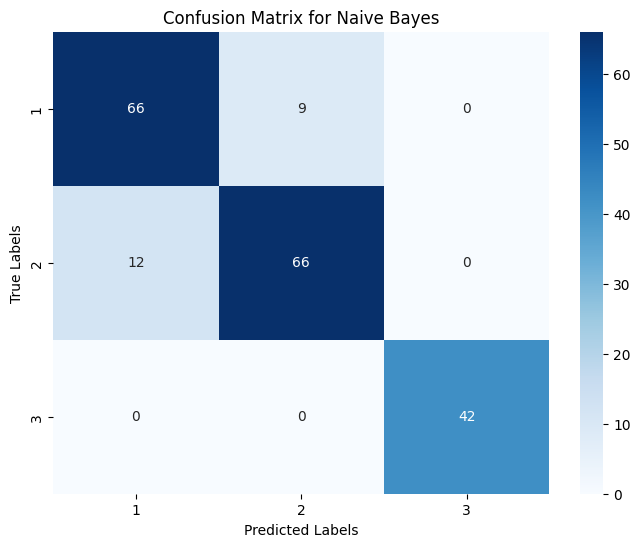

In [25]:
cm = confusion_matrix(yC_pred, yC_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_classification), yticklabels=np.unique(y_classification))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### The model with the highest accuracy score was the Random Forest Classifier, with 91% accuracy and hyperparameters = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 250}.

### By looking at the evaluation metrics we can see that for every model the highest Experience Level is the easiest one to classify, every model was able to predict it with 100% precision. Class 2 seems to be the hardest one to classify. We can conclude this by looking at the precision scores for each model and also at their confusion matrix, since it is easier to confound class 2 with class 1, but the opposite doesn't happen very often.

# Regression

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Linear regression

In [27]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(XR_train, yR_train)
yR_pred = linReg.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Mean Absolute Error (MAE): 30.22
Mean Squared Error (MSE): 1639.91
Root Mean Squared Error (RMSE): 40.50
R² (Coefficient of Determination): 0.98


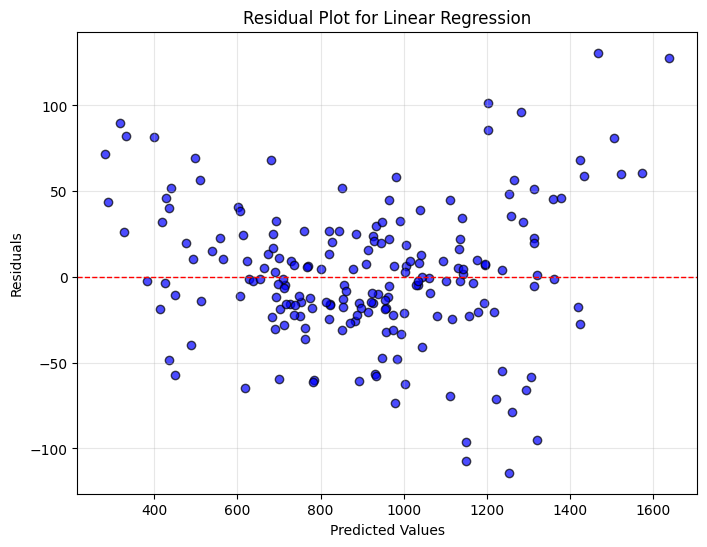

In [28]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

## Polynomial Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures()

pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Define the parameter grid (only tuning the degree of the polynomial)
param_grid = {
    "poly_features__degree": [1, 2, 3, 4, 5]  # Degrees of the polynomial
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)

# Evaluate on test set
best_poly = grid_search.best_estimator_
yR_pred = best_poly.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'poly_features__degree': 2}
Best Cross-Validation Score: 767.2513370101524
Mean Absolute Error (MAE): 19.97
Mean Squared Error (MSE): 639.28
Root Mean Squared Error (RMSE): 25.28
R² (Coefficient of Determination): 0.99


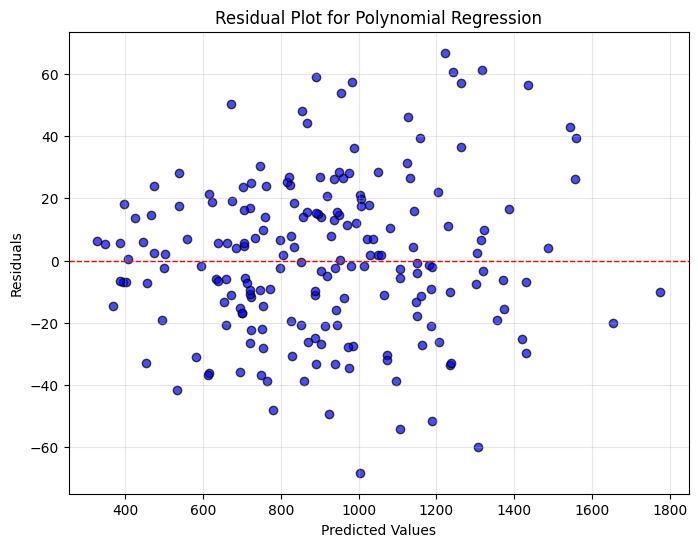

In [30]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Polynomial Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

##  Support Vector Regression

In [41]:
from sklearn.svm import SVR

svr = SVR()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

best_svr = grid_search.best_estimator_
yR_pred = best_svr.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score (MSE): 1685.8862760739853
Mean Absolute Error (MAE): 31.03
Mean Squared Error (MSE): 1752.48
Root Mean Squared Error (RMSE): 41.86
R² (Coefficient of Determination): 0.98


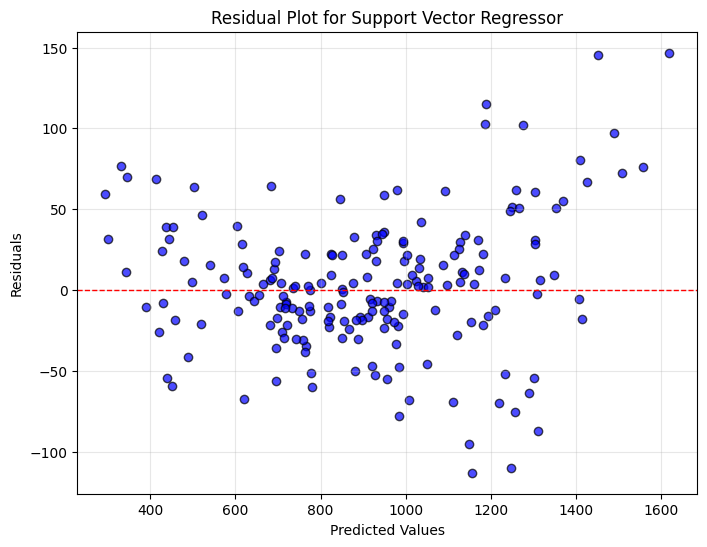

In [42]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Support Vector Regressor")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

## Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 20],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],    # Number of features to consider for the best split
    'criterion': ['squared_error', 'friedman_mse'],  # Splitting criteria for regression
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

best_dtr = grid_search.best_estimator_
yR_pred = best_dtr.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score (MSE): 4700.032073970682
Mean Absolute Error (MAE): 51.14
Mean Squared Error (MSE): 4629.40
Root Mean Squared Error (RMSE): 68.04
R² (Coefficient of Determination): 0.94


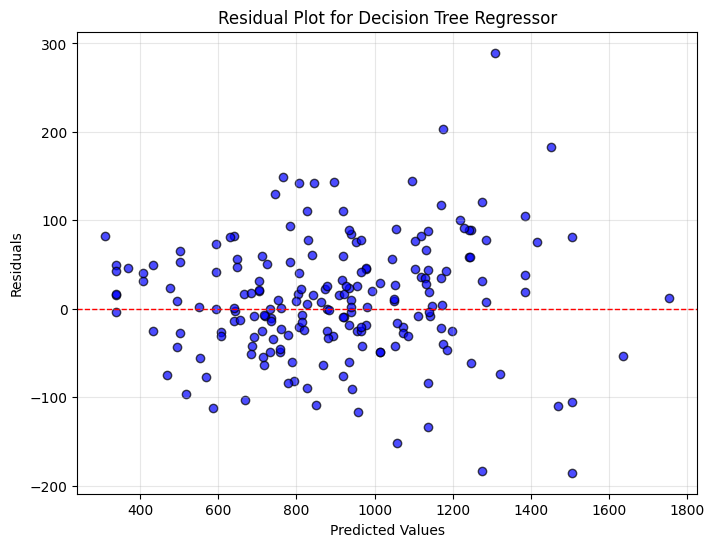

In [34]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Decision Tree Regressor")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 250],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

best_rfr = grid_search.best_estimator_
yR_pred = best_rfr.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 250}
Best Cross-Validation Score (MSE): 2261.740451947461
Mean Absolute Error (MAE): 36.57
Mean Squared Error (MSE): 2366.19
Root Mean Squared Error (RMSE): 48.64
R² (Coefficient of Determination): 0.97


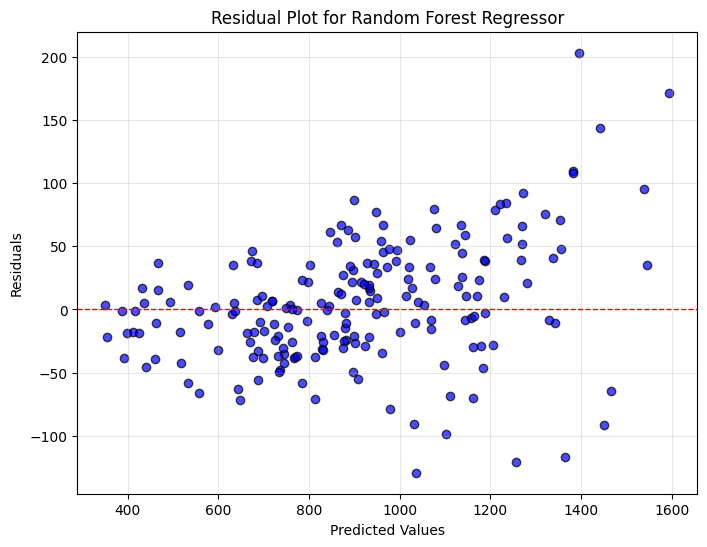

In [50]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Random Forest Regressor")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

## Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

rr = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],           # Whether to calculate the intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solvers available for Ridge
}

grid_search = GridSearchCV(rr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

best_rr = grid_search.best_estimator_
yR_pred = best_rr.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Parameters: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'sag'}
Best Cross-Validation Score (MSE): 1592.0985282574507
Mean Absolute Error (MAE): 30.23
Mean Squared Error (MSE): 1640.17
Root Mean Squared Error (RMSE): 40.50
R² (Coefficient of Determination): 0.98


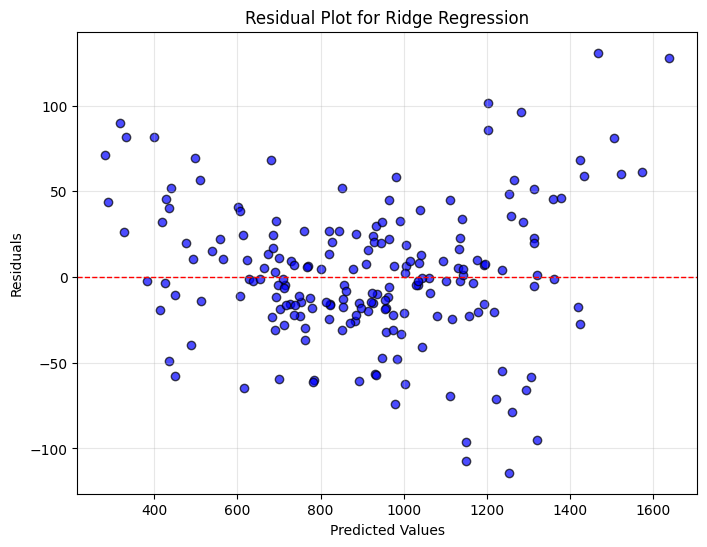

In [38]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

## Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

lr = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [700, 1000, 1500]
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(XR_train, yR_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)

best_lr = grid_search.best_estimator_
yR_pred = best_lr.predict(XR_test)

mae = mean_absolute_error(yR_test, yR_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(yR_test, yR_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(yR_test, yR_pred)
print(f"R² (Coefficient of Determination): {r2:.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'alpha': 0.001, 'max_iter': 700}
Best Cross-Validation Score (MSE): 1592.4459520221033
Mean Absolute Error (MAE): 30.22
Mean Squared Error (MSE): 1639.92
Root Mean Squared Error (RMSE): 40.50
R² (Coefficient of Determination): 0.98


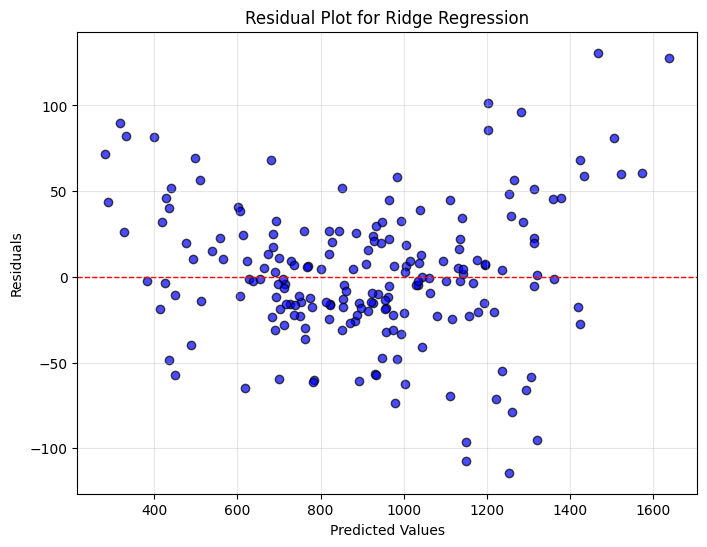

In [40]:
# Calculate residuals
residuals = yR_test - yR_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(yR_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True, alpha=0.3)
plt.show()

### By looking at the evaluations metrics we can see that the Polynomial Regressor with 2 degrees is the best model, having the lowest erros and highest coefficient of determination. We can also see in the plots thats its residuals were the lowest from all models.

### Most models had similar performance and residual plot, from which we can see that the lowests and highest predictions are the ones with higher residuas. This implies that the relationship between data and labels is indeed non-linear, which explains why polynomial regression worked better.

## Final conclusions

### Properly tuned hyperparameters can significantly enhance the predictive accuracy and generalization ability of a model. It also enables fair comparison between different models when all of them have their hyperparameters tuned.

### Performing cross validation is of great importance to detect overfitting and help evaluate and compare the performance of different hyperparameter configurations in grid search.